# Exploratory Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load and inspect dataset
df = pd.read_csv("data/mental_health_social_media_dataset.csv")
df.head(15)

,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,Neha Patel,24,1/12/2024,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,Ananya Naidu,26,1/6/2024,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,Neha Das,66,1/17/2024,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,Reyansh Banerjee,31,1/28/2024,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed
5,Myra Kale,25,2/8/2024,Female,Snapchat,516,284,1,3,6.4,8,3,8,5,Stressed
6,Ananya Kulkarni,29,2/19/2024,Other,Snapchat,328,180,1,2,7.4,27,3,7,6,Stressed
7,Meera Das,28,1/11/2024,Female,Facebook,394,138,1,1,7.0,21,2,7,6,Stressed
8,Vihaan Naidu,31,1/22/2024,Male,Facebook,326,114,0,1,7.4,27,2,6,6,Stressed
9,Meera Patil,26,2/2/2024,Female,Facebook,339,119,0,1,7.3,26,2,6,6,Stressed


In [4]:
# Summarize
df.describe()

,age,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,29.947800,373.058200,175.331600,0.864200,1.835400,7.134660,22.693400,2.510400,7.107600,5.625800
std,12.279936,106.003916,71.209329,0.555176,0.943443,0.533184,10.602862,0.794996,1.062378,0.759928
min,13.000000,140.000000,35.000000,0.000000,0.000000,6.400000,8.000000,1.000000,5.000000,4.000000
25%,21.000000,310.000000,118.000000,1.000000,1.000000,6.700000,14.000000,2.000000,6.000000,5.000000
50%,27.000000,388.000000,170.000000,1.000000,2.000000,7.100000,21.000000,3.000000,7.000000,6.000000
75%,35.250000,461.000000,231.000000,1.000000,2.000000,7.450000,29.000000,3.000000,8.000000,6.000000
max,69.000000,520.000000,338.000000,2.000000,4.000000,8.300000,46.000000,4.000000,9.000000,7.000000


In [5]:
# Check data types
print(df.dtypes)

person_name                     object
age                              int64
date                            object
gender                          object
platform                        object
daily_screen_time_min            int64
social_media_time_min            int64
negative_interactions_count      int64
positive_interactions_count      int64
sleep_hours                    float64
physical_activity_min            int64
anxiety_level                    int64
stress_level                     int64
mood_level                       int64
mental_state                    object
dtype: object


In [6]:
# Verify data is complete
int(df.isna().sum().sum()) == 0

True

In [7]:
# Check options for categorical data
for col in ['gender', 'platform', 'mental_state']:
    print(f"{col}: {df[col].unique()}")

gender: ['Male' 'Female' 'Other']
platform: ['Instagram' 'Snapchat' 'Facebook' 'WhatsApp' 'TikTok' 'YouTube' 'Twitter']
mental_state: ['Stressed' 'Healthy' 'At_Risk']


(array([1.3803, 0.1023, 0.0174]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

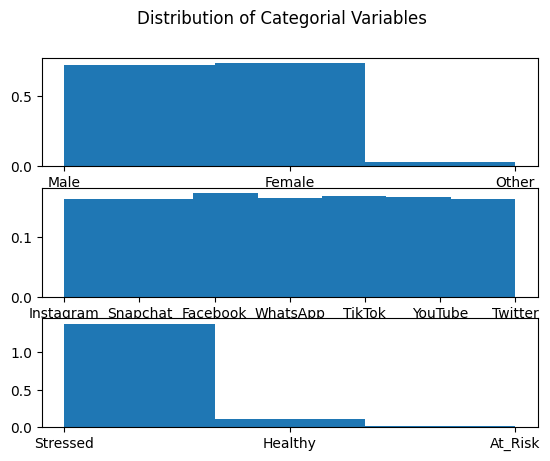

In [15]:
# Check distribution of categorial data
fig, ax = plt.subplots(3)
fig.suptitle('Distribution of Categorial Variables')
ax[0].hist(df.gender, density=True, bins=3)
ax[1].hist(df.platform, density=True, bins=7)
ax[2].hist(df.mental_state, density=True, bins=3)

In [22]:
# Check options for calculated columns
for col in ['anxiety_level', 'stress_level', 'mood_level']:
    print(f"{col}: {df[col].unique()}")

## Should we convert these to scales of 1-4 or 1-5 ??

anxiety_level: [2 3 1 4]
stress_level: [7 8 6 5 9]
mood_level: [6 5 7 4]


## Possible Research Questions
- Do men and women use social media differently?
- Does screen time predict mental health status?
- Does social media time predict mental health status?
- What's the relationship between sleep and mood/stress/anxiety?
- Which platform leads to worst health?